# Exploratory Data Analysis

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import operator
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-02ca3833ba7d>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Functions to clean and visualize data

In [2]:
#function to read in DataFrame, label columns, and drop columns I don't need
#will use to clean both training and test data
def clean_df(filename):
    out = pd.read_csv(filename, encoding="ISO-8859-1", names=['polarity', 'id', 'date', 'query', 'user', 'text'])
    out = out.drop(labels=['id', 'date', 'query', 'user'], axis = 1)
    out = out.loc[out['polarity'] != 2]

    return out

In [3]:
#function used from previous project to create pie chart from dictionary
def homemade_pie_with_name(dictionary, title, fig_w=13, fig_h=10):
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    names = []
    counts = []
    for name, count in zip(dictionary.keys(), dictionary.values()):
        names.append(name)
        counts.append(count)
    
    out = ax.pie(counts, labels=names, autopct='%1.3f%%', shadow= True)
    ax.set_title(title)
    

    return out

## EDA Merging and Plotting

In [4]:
#merging train and test data for EDA purposes
#will discard later
dirty_train = pd.read_csv('../trainingandtestdata/training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", names=['polarity', 'id', 'date', 'query', 'user', 'text'])
dirty_test = pd.read_csv('../trainingandtestdata/testdata.manual.2009.06.14.csv', encoding="ISO-8859-1", names=['polarity', 'id', 'date', 'query', 'user', 'text'])
eda_data = pd.concat([dirty_train, dirty_test])

In [5]:
#makiing a dictionary of unique tipics and their mean sentiment
sentiment_by_topic = {}
for query in eda_data['query'].unique():
    sentiment_by_topic[query] = eda_data.loc[eda_data['query'] == query]['polarity'].mean()

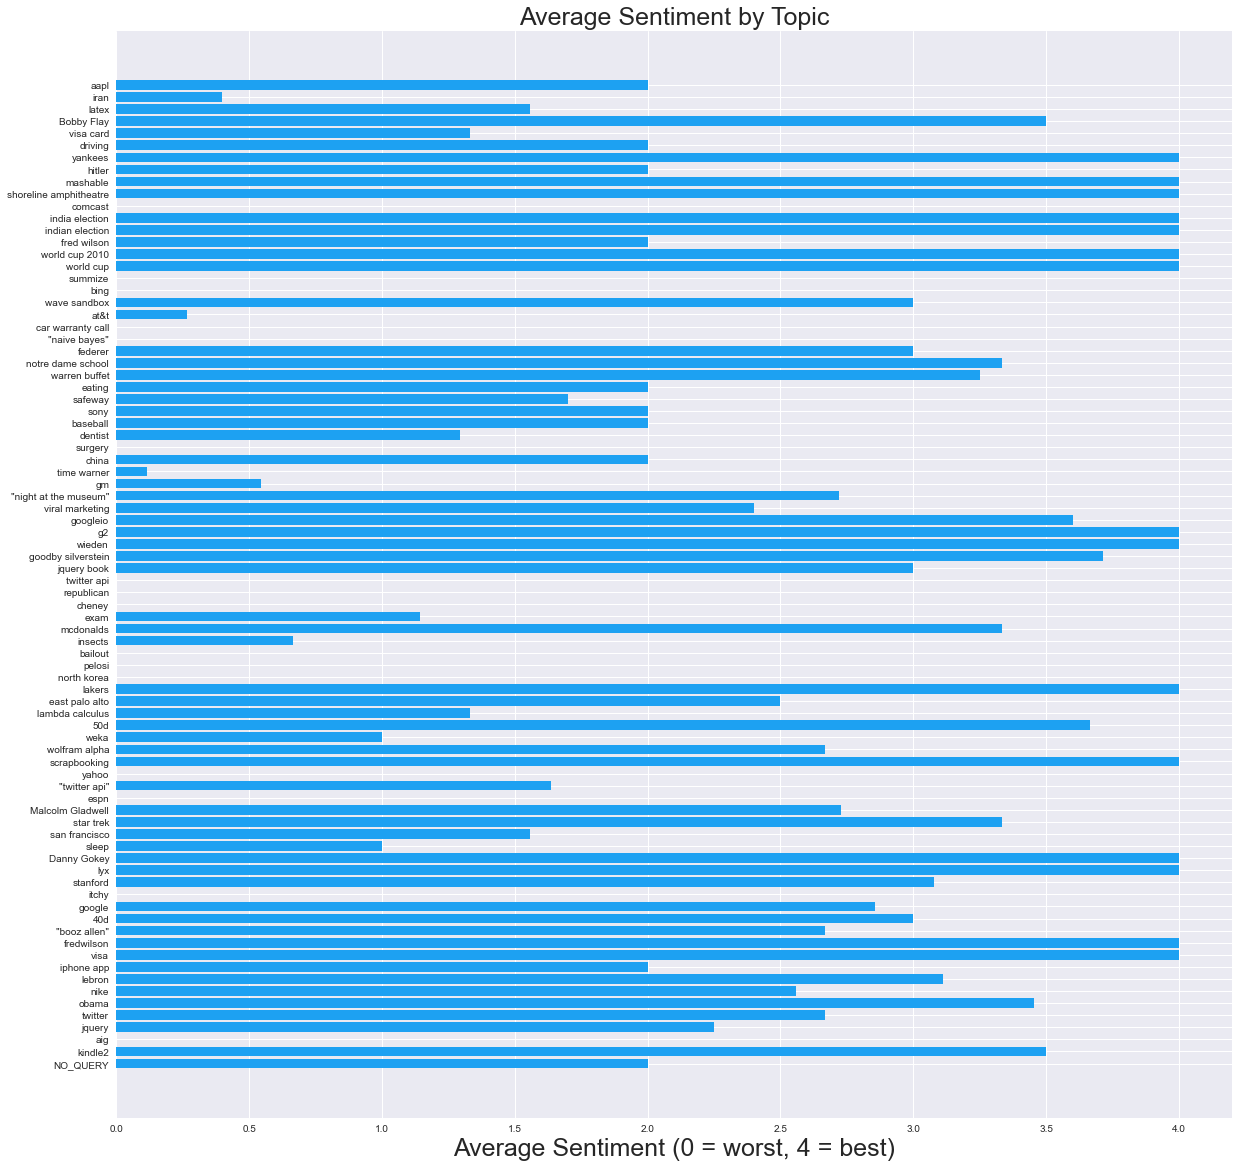

In [6]:
#plotting all topics and mean sentiment
fig, ax = plt.subplots(figsize=(20, 20))

ax.barh(list(sentiment_by_topic.keys()), list(sentiment_by_topic.values()), align='center', color='#1DA1F2')

ax.set_title("Average Sentiment by Topic", fontsize=25)
#ax.set_ylabel("Topic")
ax.set_xlabel("Average Sentiment (0 = worst, 4 = best)", fontsize=25)


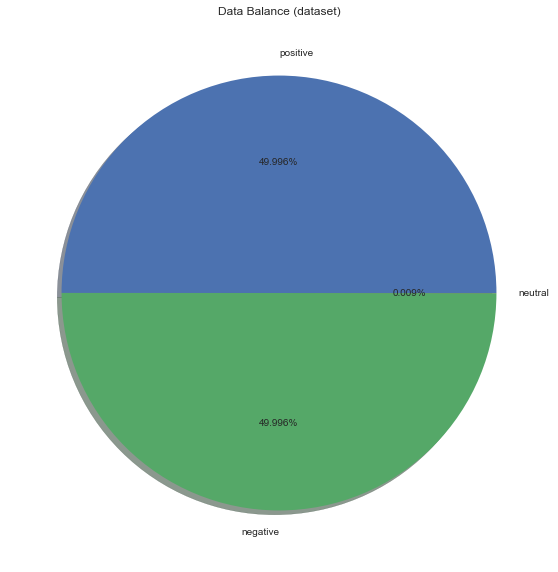

In [7]:
#this dictionary is hardcoded, but i got the numbers from .value_counts()
homemade_pie_with_name({'positive':800182,
'negative':800177,
'neutral':139}, 'Data Balance (dataset)');


In [8]:
#only using tweet text and polarity after EDA
train = clean_df('../trainingandtestdata/training.1600000.processed.noemoticon.csv')
test = clean_df('../trainingandtestdata/testdata.manual.2009.06.14.csv')

#saving into csv to use for NLP
train.to_csv('../trainingandtestdata/clean_train.csv')
test.to_csv('../trainingandtestdata/clean_test.csv')